In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.api import layers, models
import random
from sklearn.model_selection import train_test_split
from keras.api.optimizers import Adam

# Ensure full reproducibility
# seed = 1
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
# os.environ['PYTHONHASHSEED'] = str(seed)

from keras.api.metrics import AUC, Precision, Recall, F1Score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

Opinion has 2 classes

In [2]:
model = models.Sequential()

model.add(layers.Input(shape=(26, 300), name="Domain_1"))

model.add(layers.Flatten())

model.add(layers.Dense(200, activation='relu', name="layer_1"))

model.add(layers.Dropout(0.2, name="dropout_3"))

model.add(layers.BatchNormalization(name="batch_normalization_3"))

model.add(layers.Dense(100, activation='relu', name="layer_2"))

model.add(layers.Dropout(0.2, name="dropout_4"))

model.add(layers.BatchNormalization(name="batch_normalization_4"))

model.add(layers.Dense(1, activation='sigmoid', name="opinion"))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Recall(), Precision(), AUC(), F1Score(threshold=0.5)],
)

model.summary()

# from keras.api import Input, Model
# from keras.api.layers import Flatten, Dense, Dropout, BatchNormalization

# # Define the input layer
# inputs = Input(shape=(26, 300), name="Domain_1")

# # Build the network architecture
# x = Flatten()(inputs)
# x = Dense(200, activation='relu', name="layer_1")(x)
# x = Dropout(0.2, name="dropout_3")(x)
# x = BatchNormalization(name="batch_normalization_3")(x)
# x = Dense(100, activation='relu', name="layer_2")(x)
# x = Dropout(0.2, name="dropout_4")(x)
# x = BatchNormalization(name="batch_normalization_4")(x)
# outputs = Dense(1, activation='sigmoid', name="opinion")(x)

# # Create the model
# model = Model(inputs=inputs, outputs=outputs, name="opinion_model")

# # Compile the model with the specified optimizer, loss, and metrics
# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='binary_crossentropy',
#     metrics=['accuracy', Recall(), Precision(), AUC(), F1Score(threshold=0.5)]
# )

# # Display the model summary
# model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 7800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 200)            │     1,560,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ opinion (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,581,601 (6.03 MB)

 Trainable params: 1,581,001 (6.03 MB)

 Non-trainable params: 600 (2.34 KB)

In [3]:
# from keras.api.utils import plot_model
# plot_model(model, to_file="models/opinion_detection_baseline_model.png",show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [4]:
df_original = pd.read_csv("data/processed/processed_tweets.csv")

In [5]:
df_original.head()

,text,Sentiment,Has opinion,Unnamed: 3,cleaned_text,word_vectors,glove_vectors,fasttext_vectors
0,iPad: “Welcome to Apple Intelligence the newes...,-1.0,0.0,NaN,ipad welcome apple intelligence new ipad,"[array([-2.04101562e-01, -1.73828125e-01, -2.2...","[array([ 0.11563 , 0.3842 , -0.16833 , 0...",[[-0.11254 0.040199 0.014042 ... -0.0035...
1,"I believe they call it ""Apple Intelligence"", Sara",0.0,0.0,NaN,believe call apple intelligence sara,"[array([-0.1640625 , 0.01080322, 0.03320312,...","[array([-2.8593e-01, 3.4309e-01, -3.6802e-01,...",[[-0.016706 0.030139 -0.013468 ... -0.0432...
2,"Unfortunately, there's ""Apple Intelligence"" ad...",-1.0,0.0,NaN,unfortunately apple intelligence add software ...,"[array([ 8.39233398e-04, 2.33154297e-02, -1.9...","[array([-0.12328 , 0.016084 , -0.196 , 0...",[[ 3.3493e-02 1.3523e-02 3.9888e-02 ... -2.1...
3,i did turn it off globally but idk how off it ...,0.0,0.0,NaN,turn globally idk truly,"[array([-0.06298828, 0.10693359, -0.00549316,...","[array([ 1.9474e-01, 3.8828e-01, 1.3956e-01,...",[[ 0.023676 -0.06791 -0.012704 ... 0.1222...
4,"Uh…yeah. Yes, do that, Apple. I’m fine with th...",-1.0,0.0,NaN,uhyeah yes apple fine leave intelligence,"[array([ 1.15722656e-01, -1.29882812e-01, 6.5...","[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0....",[[ 0. 0. 0. ... 0. ...


In [6]:
df_with_unlabeled = df_original.copy()
df_with_unlabeled = df_with_unlabeled[df_with_unlabeled["Has opinion"].isna()]
df_original = df_original.dropna(subset=["Has opinion"])
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              800 non-null    object 
 1   Sentiment         800 non-null    float64
 2   Has opinion       800 non-null    float64
 3   Unnamed: 3        1 non-null      float64
 4   cleaned_text      800 non-null    object 
 5   word_vectors      800 non-null    object 
 6   glove_vectors     800 non-null    object 
 7   fasttext_vectors  800 non-null    object 
dtypes: float64(3), object(5)
memory usage: 56.2+ KB


In [7]:
df_original["Has opinion"].value_counts()

Has opinion
0.0    415
1.0    385
Name: count, dtype: int64

In [8]:
padded_vectors = np.load("data/processed/padded_glove_vectors.npy")
padded_vectors = padded_vectors[:800]

In [9]:
padded_vectors.shape

(800, 26, 300)

In [10]:
df_original["Has opinion"].value_counts()

Has opinion
0.0    415
1.0    385
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_vectors, df_original["Has opinion"], test_size=0.2, random_state=1)

In [13]:
X_train.shape

(640, 26, 300)

In [14]:
unique_values, counts = np.unique(y_train, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count} occurences")

0.0: 338 occurences
1.0: 302 occurences


In [15]:
from keras.api.callbacks import EarlyStopping


callback = EarlyStopping(monitor='loss', patience=5)
history = model.fit(x=X_train, y=y_train, epochs=5, callbacks=callback)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5879 - auc: 0.6226 - f1_score: 0.5672 - loss: 0.7838 - precision: 0.5637 - recall: 0.5715
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8373 - auc: 0.9003 - f1_score: 0.8282 - loss: 0.4094 - precision: 0.8279 - recall: 0.8288
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8811 - auc: 0.9528 - f1_score: 0.8718 - loss: 0.3002 - precision: 0.9058 - recall: 0.8418
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9216 - auc: 0.9820 - f1_score: 0.9170 - loss: 0.2115 - precision: 0.9463 - recall: 0.8899
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9758 - auc: 0.9939 - f1_score: 0.9743 - loss: 0.1224 - precision: 0.9863 - recall: 0.9627


In [16]:
history.history.keys

<function dict.keys>

In [ ]:
# model.save("models/opinion_detection_original.keras")

Text(0.5, 0, 'epocha')

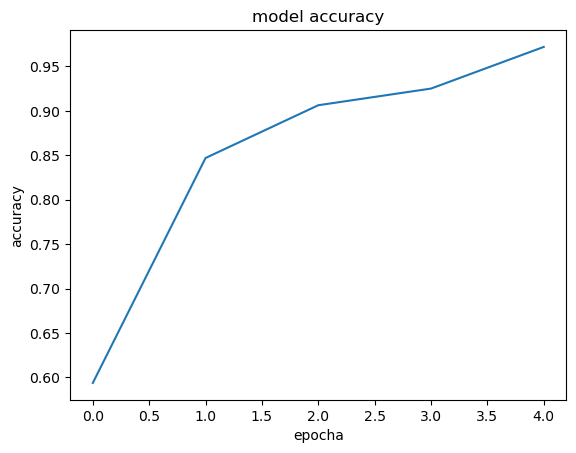

In [37]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epocha')

Text(0.5, 0, 'epocha')

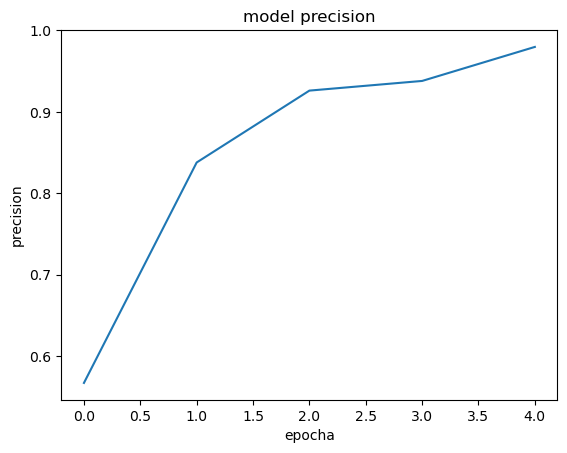

In [38]:
plt.plot(history.history['precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epocha')

Text(0.5, 0, 'epocha')

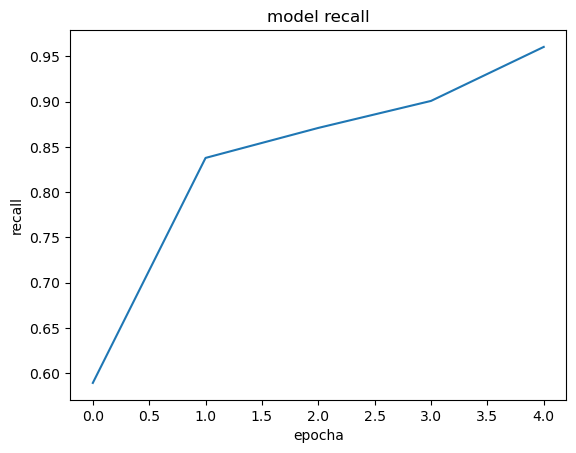

In [39]:
plt.plot(history.history['recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epocha')

Text(0.5, 0, 'epocha')

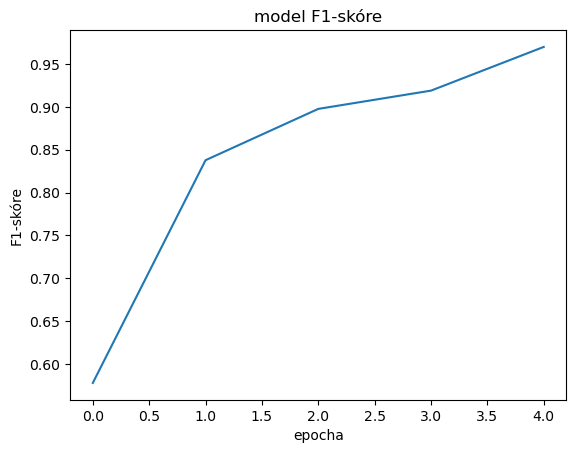

In [40]:
plt.plot(history.history['f1_score'])
plt.title('model F1-skóre')
plt.ylabel('F1-skóre')
plt.xlabel('epocha')

Text(0.5, 0, 'epocha')

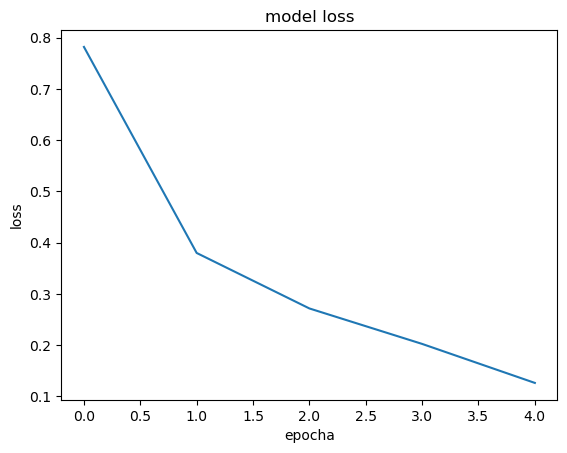

In [41]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epocha')

In [23]:
evaluation = model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6095 - auc: 0.6683 - f1_score: 0.6192 - loss: 0.7189 - precision: 0.6075 - recall: 0.6332 


In [24]:
print(f'Loss: {evaluation[0]}, accuracy: {evaluation[1]}, Recall: {evaluation[2]}, Precision: {evaluation[3]}, AUC: {evaluation[4]}, F1_score: {evaluation[5]}')

Loss: 0.6899871826171875, accuracy: 0.6187499761581421, Recall: 0.6746987700462341, Precision: 0.6222222447395325, AUC: 0.6986386775970459, F1_score: 0.6473987698554993


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


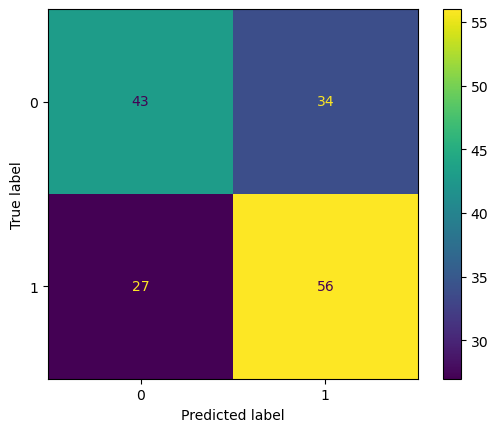

In [25]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
matrix = confusion_matrix(y_test, y_pred)

display = ConfusionMatrixDisplay(matrix)
display.plot()

In [26]:
model = models.Sequential()

model.add(layers.Input(shape=(26, 300), name="Domain_1"))

model.add(layers.Flatten())

model.add(layers.Dense(200, activation='relu', name="layer_1"))

model.add(layers.Dropout(0.2, name="dropout_3"))

model.add(layers.BatchNormalization(name="batch_normalization_3"))

model.add(layers.Dense(100, activation='relu', name="layer_2"))

model.add(layers.Dropout(0.2, name="dropout_4"))

model.add(layers.BatchNormalization(name="batch_normalization_4"))

model.add(layers.Dense(1, activation='sigmoid', name="opinion"))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Recall(), Precision(), AUC(), F1Score(threshold=0.5)]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 7800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 200)            │     1,560,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ opinion (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,581,601 (6.03 MB)

 Trainable params: 1,581,001 (6.03 MB)

 Non-trainable params: 600 (2.34 KB)

In [27]:
df_with_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7030 entries, 800 to 7829
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              7030 non-null   object 
 1   Sentiment         0 non-null      float64
 2   Has opinion       0 non-null      float64
 3   Unnamed: 3        0 non-null      float64
 4   cleaned_text      7026 non-null   object 
 5   word_vectors      7030 non-null   object 
 6   glove_vectors     7030 non-null   object 
 7   fasttext_vectors  7030 non-null   object 
dtypes: float64(3), object(5)
memory usage: 494.3+ KB


In [ ]:
unlabeled_padded_vectors = np.load("data/processed/padded_glove_vectors.npy")[801:]
unlabeled_padded_vectors.shape

(7029, 26, 300)

In [ ]:
print("Labeled data shape:", padded_vectors.shape)
print("Unlabeled data shape:", unlabeled_padded_vectors.shape)


Labeled data shape: (800, 26, 300)
Unlabeled data shape: (7029, 26, 300)


In [ ]:

from scripts.experiments.experiment_1.DataDistillation import DataDistillation

distillation = DataDistillation(
    model,
    (padded_vectors, df_original["Has opinion"]),
    unlabeled_padded_vectors, epochs=5, pseudo_batch_size=1000, random_state=1, validation_split=0.2, metric_to_evaluate_with='f1_score'
)


In [31]:
distillation.start()

Starting Data Distillation
Training model on labeled training data with shape: (640, 26, 300)
Evaluating model on internal validation set with metric f1_score...
Teacher performance on validation set: 0.6703296303749084

Iteration 1
Teacher predicting on batch with shape: (1000, 26, 300)
Pseudo‑labeled samples in this iteration: 543
Training student on combined data of shape: (1183, 26, 300)
Evaluating model on internal validation set with metric f1_score...
Student performance on validation set: 0.6871793866157532
Student outperformed teacher. Updating teacher model.

Iteration 2
Teacher predicting on batch with shape: (1000, 26, 300)
Pseudo‑labeled samples in this iteration: 779
Training student on combined data of shape: (1962, 26, 300)
Evaluating model on internal validation set with metric f1_score...
Student performance on validation set: 0.681564211845398
Student did not outperform teacher. Stopping data distillation.
Data distillation process completed.
Final teacher performanc

In [32]:
x_val, y_val = distillation.get_validation_set()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


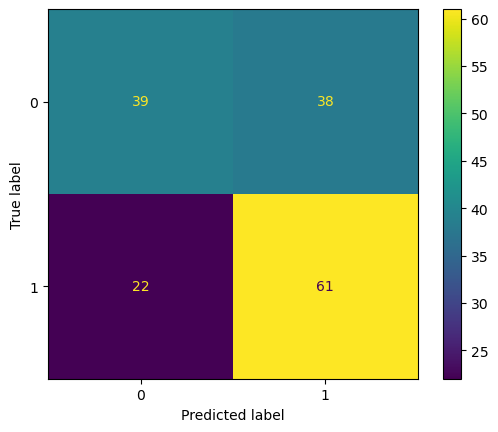

In [33]:
y_pred = (model.predict(x_val) > 0.5).astype(int)
matrix = confusion_matrix(y_val, y_pred)

display = ConfusionMatrixDisplay(matrix)
display.plot()

In [ ]:
# best_model = distillation.get_model()
# best_model.summary()
# best_model.save("models/experiments/experiment_1/experiment_1_opinion_detection_model.keras")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 7800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 200)            │     1,560,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ opinion (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,743,605 (18.10 MB)

 Trainable params: 1,581,001 (6.03 MB)

 Non-trainable params: 600 (2.34 KB)

 Optimizer params: 3,162,004 (12.06 MB)